<a href="https://colab.research.google.com/github/sphereofrealization/544lab/blob/master/Particle_Drive_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed

# Define constants
a = 5  # Length of side of square
v = 10  # Velocity
tMax = 2  # Maximum time

# Function to create the path visualization
def visualize_path(t):
    theta_values = np.linspace(0, 2 * np.pi, 9, endpoint=False)
    arrows = []
    for theta in theta_values:
        arrows.append(plt.arrow(0, 0, v * t * np.cos(theta), v * t * np.sin(theta),
                                color='blue', head_width=0.05))
    plt.arrow(0, 0, v * t * np.cos(0), v * t * np.sin(0), color='red', linewidth=0.02)
    plt.arrow(0, 0, v * t * np.cos(0), 1.5 * v * t * np.sin(0), color='green', linewidth=0.02)
    plt.plot([a], [a], 'ko', markersize=5)
    plt.xlim([-v * tMax - a, v * tMax + a])
    plt.ylim([-v * tMax - a, v * tMax + a])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Particle Path at Time t = {t:.2f}")
    plt.show()

# Function to create the interactive animation
def animate_particle(t, phi):
    x = a + v * t * np.cos(phi)
    y = a + v * t * np.sin(phi)
    plt.figure(figsize=(6, 6))
    visualize_path(t)  # Call the path visualization function
    plt.plot(x, y, 'ko', markersize=0.1)
    plt.show()

# Create interactive controls
interact(animate_particle, t=fixed(0), phi=(0, 2 * np.pi, 0.1));

interactive(children=(FloatSlider(value=3.1, description='phi', max=6.283185307179586), Output()), _dom_classe…

TypeError: ignored

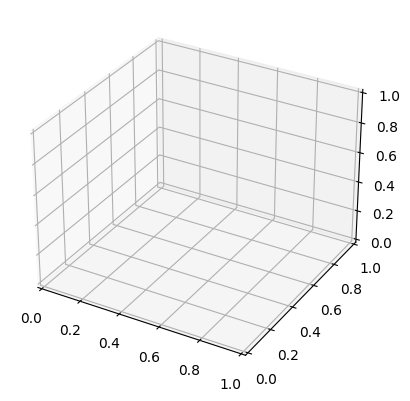

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants and functions
r = 0.5  # Radius of the circle
K = 1  # Constant K

def f1(theta):
    return np.arcsin(np.sin(theta)) + np.pi/2 * (1 - np.pi/(2*theta))

def f2(theta):
    return np.arcsin(np.cos(theta)) + np.pi/2 * (1 - np.pi/(2*theta))

def Y(l):
    return np.array([np.cos(l), np.sin(l)])

x0 = np.array([1, 1])  # Initial point

# Visualization of sets (Ar and Br not defined, so commenting out)
# plt.figure(1)
# plt.region_plot(Ar, Br, ...)  # Replace with actual definitions of Ar

# Curves x(s,l) and x(0,l)
def x(s, l):
    return x0 + r * np.sin(s) * Y(np.array([l]))

def x0l(l):
    return x0 + r * np.sin(s) * Y(l, t)

# Cone function
def cone(s, l, t):
    return np.array([np.cos(t) * x(s, l)[0], np.sin(t) * x(s, l)[0], t * x(s, l)[1]])

# Parametric plot of the folded cone (corrected version)
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

# Reshape cone output directly into a 3D grid for plot_surface
X, Y, Z = np.meshgrid(np.linspace(0, np.pi/2, 50),  # s
                      np.linspace(0, 2*np.pi, 50),  # l
                      np.linspace(0, 1, 50))  # t
cone_data = cone(X, Y, Z)  # Evaluate cone function on the grid

ax.plot_surface(cone_data[:, :, 0], cone_data[:, :, 1], cone_data[:, :, 2],
                 alpha=0.8, cmap='viridis')  # Plot the surface
ax.plot_surface(s(np.linspace(0, np.pi / 2, 50), 1), l=np.expand_dims(np.linspace(0, 2 * np.pi, 50), 1), t=np.linspace(0, 2 * np.pi, 50))
# Combine the
plt.plot(np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100)), 0, color='red', linewidth=2)
plt.plot_surface(*cone.T, s=np.linspace(0, np.pi/2, 50), l=np.linspace(0, 2*np.pi, 50), t=0,
                 alpha=0.8, cmap='viridis')
plt.axis('off')
plt.view_init(-2, -2, 2)
plt.show()

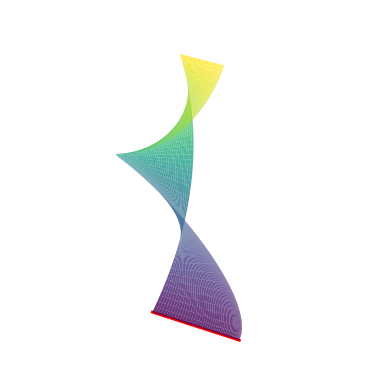

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants and functions
r = 0.5  # Radius of the circle
x0 = np.array([1, 1])  # Initial point

def Y(l):
    return np.array([np.cos(l), np.sin(l)])

# Curves x(s,l)
def x(s, l):
    return x0 + r * np.sin(s) * Y(l)

# Cone function
# This function correctly now calculates a point on the cone based on s, l and t.
def cone(s, l, t):
    x_sl = x(s, l)
    return np.array([np.cos(t) * x_sl[0], np.sin(t) * x_sl[1], t])

# Parametric plot of the folded cone (corrected version)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating the meshgrid properly using numpy
s = np.linspace(0, np.pi/2, 50)  # s (parameter along the arc)
l = np.linspace(0, 2*np.pi, 50)  # l (parameter around the circle)
t = np.linspace(0, 1, 50)  # t (parameter along the cone height)

# Using NumPy's broadcasting to compute the cone points - This avoids loops and is efficient.
S, T = np.meshgrid(s, t)
L = np.tile(l, (len(t), 1)).T  # This creates a repeated array of l for each t value.

# Now we evaluate the cone function on the grid points.
# We need to 'vectorize' our cone function for it to work on arrays.
cone_pts = np.vectorize(cone, signature='(),(),()->(n)')(S, L, T)

# We extract X, Y, Z coordinates for plotting
X = cone_pts[..., 0]
Y = cone_pts[..., 1]
Z = cone_pts[..., 2]

# Plot the surface. The surface is defined by the X, Y, Z arrays.
ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')

# Combining the plot with a base circle at the bottom.
# We use the first row of X, Y since it corresponds to the base circle (t=0).
ax.plot(X[0], Y[0], np.zeros_like(X[0]), color='red', linewidth=2)

# Hide axes for better visibility
plt.axis('off')

# Show the plot
plt.show()


In [59]:
# Constants and functions
z = 5
m = 3
a = 2
def spec(i, j):
    if i == j and i <= 0:
        return 0
    elif i > 0:
        return spec(i-1)
    else:
        return 0

# Creating the meshgrid properly using numpy
I = np.arange(m*a + np.sqrt(z))
J = np.arange(m*a + np.sqrt(z))

# Now we evaluate the spec function on the grid points.
# We need to 'vectorize' our spec function for it to work on arrays.
spec_pts = np.vectorize(spec, signature='(),()->()')(I, J)

# We extract the pi_ij coordinates for plotting
pi = spec_pts

# Plot the matrix. The matrix is defined by the pi array.
plt.matshow(pi)

# Set the axis ticks and labels
plt.xlabel('j')
plt.ylabel('i')

# Show the plot
plt.show()

TypeError: ignored

In [51]:
import sympy as sp  # For symbolic differentiation

class SigmaOperator:
    def __init__(self, logical_ops, diff_func):
        """
        Initializes the operator sigma with logical operations and differentiation function.

        Args:
            logical_ops (dict): A dictionary mapping logical operators to their corresponding functions.
            diff_func (function): The differentiation function to be used.
        """
        self.logical_ops = logical_ops
        self.diff_func = diff_func

    def __call__(self, statement):
        """
        Applies the operator sigma to a given statement.

        Args:
            statement (str): A string representing a logical statement.

        Returns:
            str: The negated statement.
        """

        # Split the statement into tokens
        tokens = statement.split()

        # Apply logical operations and differentiation
        for i, token in enumerate(tokens):
            if token in self.logical_ops:
                tokens[i] = self.logical_ops[token](tokens[i + 1])
            elif self.diff_func is not None:
                tokens[i] = sp.diff(tokens[i], 'x')  # Using SymPy for symbolic differentiation

        # Combine tokens back into a string
        negated_statement = " ".join(tokens)

        # Negate the entire statement
        return f"not ({negated_statement})"

In [52]:
import numpy as np
from scipy.integrate import quad  # For numerical integration

# Define constants
Omega0 = 11.444  # J
OmegaInf = 0.01  # Value for OmegaInf
OmegaLambda = 9.47408e-12  # J
OmegaAlpha = 0.05  # Value for OmegaAlpha
OmegaL = 0.0  # Value for OmegaL
OmegaM = 1.0  # Value for OmegaM
sigma = 0.5  # Value for sigma

# Define elementary functions (using NumPy)
def atan(x):
    return np.arctan(x)

def exp(x):
    return np.exp(x)

# Define the encephalon wave function
def encephal_wave_function(x, y, sigma):
    """
    Calculates the encephalon wave function.

    Args:
        x: Input value(s) for the first integral.
        y: Input value(s) for the second integral.
        sigma: The differential weighting coefficient.

    Returns:
        float: The value of the encephalon wave function.
    """

    integrand1 = lambda x: np.exp(OmegaLambda * atan(OmegaInf * np.sqrt(sigma * x)))
    integral1, _ = quad(integrand1, OmegaL, OmegaM)  # Numerical integration

    integrand2 = lambda y: np.exp(OmegaLambda * np.exp(OmegaInf * np.sqrt(sigma * y)))
    integral2, _ = quad(integrand2, OmegaL, OmegaM)  # Numerical integration

    # Combine integrals and other terms according to the equation
    E = Omega0 * (integral1 + integral2)

    return E

# Example usage
x = np.linspace(0.0, 1.0, 100)  # Input values for x
y = np.linspace(0.0, 1.0, 100)  # Input values for y

In [53]:
import random  # Assuming randomness is involved

# --- Define game elements and mechanics based on your input ---

def play_game():
    """Main game loop."""

    # Initialize game state and variables

    while game_is_not_over:

        # --- Player actions based on game rules and Axiom of Choice usage ---

        # --- Game logic and outcomes ---

        # --- Check for winning conditions or end of round ---

    # --- Determine winner or scores ---

def iterate_game(variation):
    """Implements a variation of the game."""

    # --- Adjust game elements or mechanics based on the variation ---

    play_game()

# --- Example usage (will need adaptation) ---

play_game()
iterate_game("version_2")
iterate_game("version_with_entanglement")

IndentationError: ignored

In [54]:
!pip install anytree
import sympy as sp  # For symbolic mathematics
from anytree import Node, RenderTree  # For tree representation
class Integral(Node):
    def __init__(self, subscript=None, product=None, differentials=None, symbol=None, sets=None):
        super().__init__()
        self.subscript = subscript
        self.product = product
        self.differentials = differentials
        self.symbol = symbol
        self.sets = sets

# Define similar classes for Subscript, Product, Differential, Symbol, Set, etc.
expressions = [
    # Parse each expression using SymPy or another suitable library
]
root_node = None
for expression in expressions:
    # Analyze the expression's syntax and build the corresponding tree structure
    # using the defined classes
    # Example:
    integral_node = Integral(
        subscript=expression.args[0],
        product=expression.args[1],
        # ...other arguments...
    )
    # Add child nodes to integral_node based on the expression's structure

In [13]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Constants
a = 5  # Length of side of square
v = 10  # Velocity
t_max = 2  # Maximum time

# Create sliders for time and angle
t_slider = widgets.FloatSlider(value=0, min=0, max=t_max, step=0.1, description="time")
phi_slider = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.1, description="angle")

# Define function to create the visualization
def visualize(t, phi):
    import matplotlib.pyplot as plt

    # Create figure and axes
    fig, ax = plt.subplots()

    # Arrows for paths
    ax.arrow(0, 0, v*t*np.cos(0), v*t*np.sin(0), color='blue', head_width=0.15)
    ax.arrow(0, 0, v*t*np.cos(45*np.pi/180), v*t*np.sin(45*np.pi/180), color='red', linewidth=0.02)
    ax.arrow(0, 0, v*t*np.cos(90*np.pi/180), v*t*np.sin(90*np.pi/180), color='green', linewidth=0.02)

    # Points for corners and particle
    ax.scatter([0, a, a, 0, a + v*t*np.cos(phi)], [0, 0, a, a, a + v*t*np.sin(phi)], color='black')

    # Labels and limits
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(-a - v*t_max, 2*a + v*t_max)
    ax.set_ylim(-a - v*t_max, 2*a + v*t_max)
    ax.set_aspect('equal')

    # Display the plot
    plt.show()

# Link sliders to visualization function
widgets.interact(visualize, t=t_slider, phi=phi_slider)

interactive(children=(FloatSlider(value=0.0, description='time', max=2.0), FloatSlider(value=0.0, description=…

<function __main__.visualize(t, phi)>

In [14]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Constants
a = 5  # Length of side of square
v = 10  # Velocity
t_max = 2  # Maximum time

# Create sliders for time and angle
t_slider = widgets.FloatSlider(value=0, min=0, max=t_max, step=0.1, description="time")
phi_slider = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.1, description="angle")

# Define function to create the visualization
def visualize(t, phi):
    # Create figure and axes
    fig, ax = plt.subplots()

    # Arrows for paths at fixed angles
    ax.arrow(0, 0, v*t*np.cos(0), v*t*np.sin(0), color='blue', head_width=0.15)
    ax.arrow(0, 0, v*t*np.cos(np.pi/4), v*t*np.sin(np.pi/4), color='red', head_width=0.15)
    ax.arrow(0, 0, v*t*np.cos(np.pi/2), v*t*np.sin(np.pi/2), color='green', head_width=0.15)

    # Add the custom angle arrow using the value from `phi_slider`
    ax.arrow(0, 0, v*t*np.cos(phi), v*t*np.sin(phi), color='orange', head_width=0.15)

    # Points for corners of the square and particle at the custom angle
    ax.scatter([0, a, a, 0], [0, 0, a, a], color='black')  # Corners of the square
    ax.scatter(v*t*np.cos(phi), v*t*np.sin(phi), color='black')  # Particle

    # Labels and limits
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(-a, a + v*t_max)
    ax.set_ylim(-a, a + v*t_max)
    ax.set_aspect('equal')

    # Display the plot
    plt.show()

# Link sliders to visualization function
widgets.interact(visualize, t=t_slider, phi=phi_slider)

interactive(children=(FloatSlider(value=0.0, description='time', max=2.0), FloatSlider(value=0.0, description=…

<function __main__.visualize(t, phi)>

In [15]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Constants
a = 5  # Length of side of square
v = 10  # Velocity
t_max = 2  # Maximum time

# Create sliders for time and angle
t_slider = widgets.FloatSlider(value=0, min=0, max=t_max, step=0.1, description="time")
phi_slider = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.1, description="angle")

# Define function to create the visualization
def visualize(t, phi):
    # Create figure and axes
    fig, ax = plt.subplots()

    # Arrow for the path of the particle at 0 degrees
    ax.arrow(0, 0, v*t*np.cos(0), v*t*np.sin(0), color='blue', length_includes_head=True, head_width=0.15)

    # Arrow for the path of the particle at the angle specified by 'phi'
    ax.arrow(0, 0, v*t*np.cos(phi), v*t*np.sin(phi), color='orange', length_includes_head=True, head_width=0.15)

    # Points for corners of the square
    ax.scatter([0, a, a, 0], [0, 0, a, a], color='black')

    # Point for the particle at the custom angle
    ax.scatter(v*t*np.cos(phi), v*t*np.sin(phi), color='red')

    # Labels and limits
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(-a, a + v*t_max)
    ax.set_ylim(-a, a + v*t_max)
    ax.set_aspect('equal')

    # Display the plot
    plt.show()

# Link sliders to visualization function
widgets.interact(visualize, t=t_slider, phi=phi_slider)

interactive(children=(FloatSlider(value=0.0, description='time', max=2.0), FloatSlider(value=0.0, description=…

<function __main__.visualize(t, phi)>

In [16]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Constants
a = 5  # Length of side of the square
v = 10  # Velocity
t_max = 2  # Maximum time

# Create sliders for time and angle
t_slider = widgets.FloatSlider(value=0, min=0, max=t_max, step=0.1, description="Time")
phi_slider = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.01, description="Angle")

# Define function to create the visualization
def visualize(t, phi):
    # Create figure and axes
    fig, ax = plt.subplots()

    # Arrow for the particle path at the custom angle
    ax.arrow(0, 0, v*t*np.cos(phi), v*t*np.sin(phi), color='orange', head_width=a/20, length_includes_head=True)

    # Points for corners of the square
    square_corners = np.array([[0, 0], [a, 0], [a, a], [0, a], [0, 0]])
    ax.plot(square_corners[:, 0], square_corners[:, 1], color='blue')

    # Point for the particle
    ax.scatter(v*t*np.cos(phi), v*t*np.sin(phi), color='red', zorder=5)

    # Labels and limits
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(-a, a + v*t_max)
    ax.set_ylim(-a, a + v*t_max)
    ax.set_aspect('equal')
    ax.grid(True)

    # Display the plot
    plt.show()

# Link sliders to visualization function
widgets.interact(visualize, t=t_slider, phi=phi_slider)

interactive(children=(FloatSlider(value=0.0, description='Time', max=2.0), FloatSlider(value=0.0, description=…

<function __main__.visualize(t, phi)>

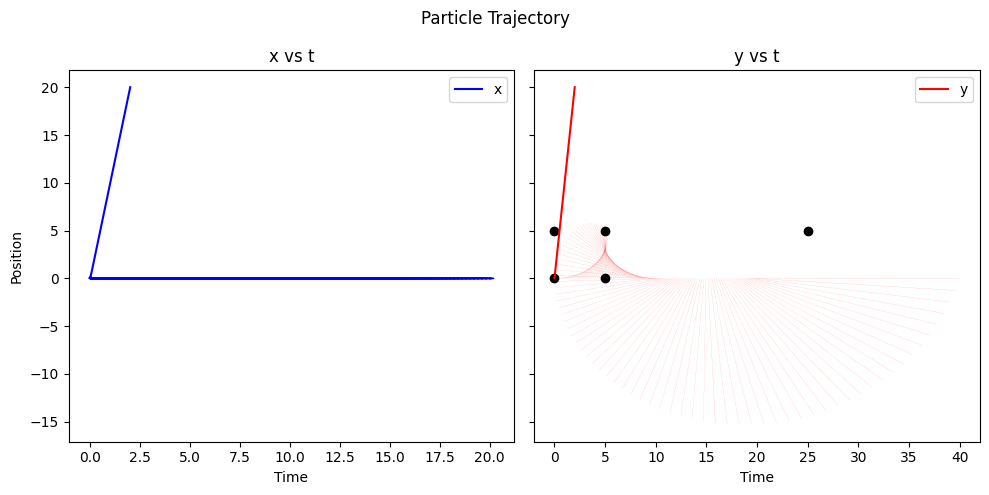

In [17]:

import matplotlib.pyplot as plt
import numpy as np

# Constants
a = 5 # Length of side of square
v = 10 # Velocity
t_max = 2 # Maximum time

# Create time and angle variables
t = np.linspace(0,t_max,100)
phi = np.linspace(0,2*np.pi,100)

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

# Plot x vs t
axs[0].plot(t, v*t, color='blue', label='x')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Position')
axs[0].legend()

# Plot y vs t
axs[1].plot(t, v*t, color='red', label='y')
axs[1].set_xlabel('Time')
axs[1].legend()

# Add arrows for paths
for i in range(len(t)):
    axs[0].arrow(0, 0, v*t[i]*np.cos(0), v*t[i]*np.sin(0), color='blue', head_width=0.15)
    axs[1].arrow(v*t[i]*np.cos(0), v*t[i]*np.sin(0), v*t[i]*np.cos(phi[i]), v*t[i]*np.sin(phi[i]), color='red', linewidth=0.02)

# Add points for corners and particle
axs[1].scatter([a, a, 0, 0, a + v*t[-1]*np.cos(phi[-1])], [0, a, a, 0, a + v*t[-1]*np.sin(phi[-1])], color='black')

# Add labels and limits
axs[0].set_title('x vs t')
axs[1].set_title('y vs t')
fig.suptitle('Particle Trajectory')
fig.tight_layout()
fig.show()

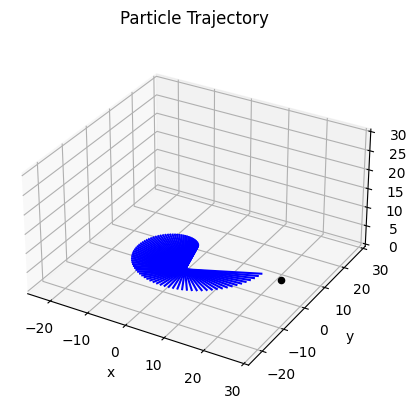

In [19]:

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Constants
a = 5 # Length of side of square
v = 10 # Velocity
t_max = 2 # Maximum time

# Create time and angle variables
t = np.linspace(0, t_max, 100)
phi = np.linspace(0, 2*np.pi, 100)

# Create figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot x, y, and z positions
X = [v*t[i]*np.cos(phi[i]) for i in range(len(t))]
Y = [v*t[i]*np.sin(phi[i]) for i in range(len(t))]
Z = [a for i in range(len(t))]

# Add lines for paths
for i in range(len(t)):
    ax.plot([0, X[i]], [0, Y[i]], [0, Z[i]], color='blue')

# Add points for particle
ax.scatter([a + X[-1]], [0], [Z[-1]], color='black')

# Add labels and limits
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-a -v*t_max, 2*a + v*t_max)
ax.set_ylim(-a -v*t_max, 2*a + v*t_max)
ax.set_zlim(0, 2*a + v*t_max)
ax.set_aspect('equal')

# Add title
plt.title('Particle Trajectory')

# Display the plot
plt.show()

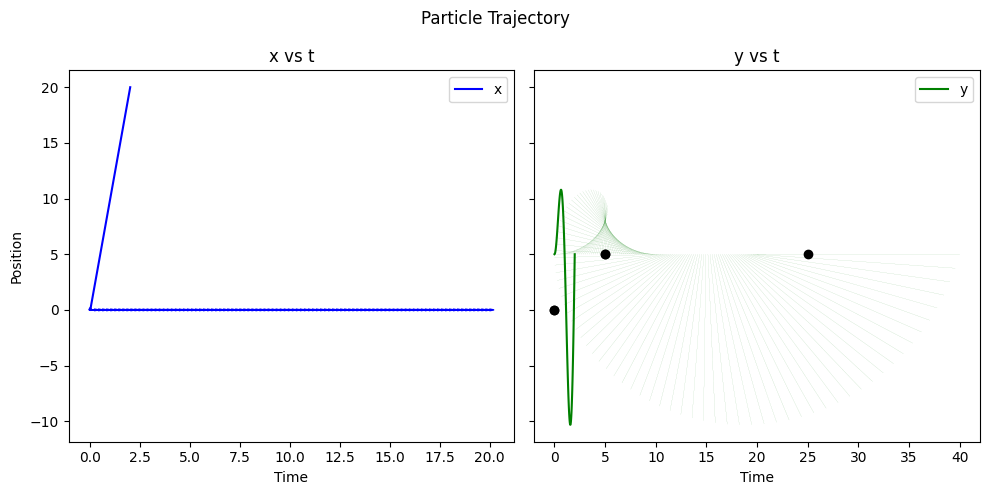

In [20]:

import matplotlib.pyplot as plt
import numpy as np

# Constants
a = 5 # Length of side of square
v = 10 # Velocity
t_max = 2 # Maximum time

# Create time and angle variables
t = np.linspace(0,t_max,100)
phi = np.linspace(0,2*np.pi,100)

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

# Plot x vs t
axs[0].plot(t, v*t, color='blue', label='x')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Position')
axs[0].legend()

# Plot y vs t
axs[1].plot(t, a + v*t*np.sin(phi), color='green', label='y')
axs[1].set_xlabel('Time')
axs[1].legend()

# Add arrows for paths
for i in range(len(t)):
    axs[0].arrow(0, 0, v*t[i]*np.cos(0), v*t[i]*np.sin(0), color='blue', head_width=0.15)
    axs[1].arrow(v*t[i]*np.cos(0), a, v*t[i]*np.cos(phi[i]), v*t[i]*np.sin(phi[i]), color='green', linewidth=0.02)

# Add points for corners and particle
axs[1].scatter([a, a, 0, 0, a + v*t[-1]*np.cos(phi[-1])], [a, a, 0, 0, a + v*t[-1]*np.sin(phi[-1])], color='black')

# Add labels and limits
axs[0].set_title('x vs t')
axs[1].set_title('y vs t')
fig.suptitle('Particle Trajectory')
fig.tight_layout()
fig.show()

In [18]:
import pygame
import sys
import math

# Constants
a = 5 # Length of side of square
v = 10 # Velocity
t_max = 2 # Maximum time
FPS = 60 # Frames per second
WIDTH = 600 # Screen width
HEIGHT = 600 # Screen height

# Initialize pygame and create screen
pygame.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Particle Trajectory")

# Create clock object for FPS control
clock = pygame.time.Clock()

# Create function for drawing the visualization
def visualize(t, phi):
    # Fill background
    screen.fill((255, 255, 255))

    # Draw paths
    pygame.draw.line(screen, (0, 0, 255), (0, 0), (v*t, v*t))
    pygame.draw.line(screen, (255, 0, 0), (v*t, v*t), (a + v*t*math.cos(phi), a + v*t*math.sin(phi)))

    # Draw corners
    pygame.draw.rect(screen, (0, 0, 0), (0, 0, a, a))
    pygame.draw.rect(screen, (0, 0, 0), (a, 0, a, a))
    pygame.draw.rect(screen, (0, 0, 0), (a, a, a, a))
    pygame.draw.rect(screen, (0, 0, 0), (0, a, a, a))

    # Draw particle
    pygame.draw.circle(screen, (0, 0, 0), (a + v*t*math.cos(phi), a + v*t*math.sin(phi)), 5)

    # Update screen
    pygame.display.update()

# Main game loop
while True:
    # Check for quit event
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    # Calculate time and angle
    t = pygame.time.get_ticks() / 1000
    d = t % t_max
    phi = (v * d) % (2*math.pi)

    # Call visualization function
    visualize(d, phi)

    # Set FPS
    clock.tick(FPS)

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: ignored

In [12]:
from sympy import symbols, Sum, Derivative, Eq, Function
from sympy import symbols
Theta, Pi, f, Mu, ... = symbols('Theta Pi f Mu ...')

# Parse expressions (replace with actual parsing code)
expr1 = ...  # Parse the first expression
expr2 = ...  # Parse the second expression

equality = Eq(expr1, expr2)
# Substitute expr2 for expr1 in another expression
new_expr = some_other_expression.subs(expr1, expr2)

# Solve for a variable in the equality
solution = solve(equality, f)[0]  # Assuming a single solution for f

SyntaxError: ignored

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def phi(exp, coeff, x, y, z):
    """Defines the function phi with adjustable parameters."""
    return exp * np.cosh(coeff * y) / (np.tanh(coeff * x) * np.cosh(coeff * y) +
                                       np.cosh(coeff * x) * (np.sinh(x) + np.sinh(y)))

def d(x, y, exponent):
    """Defines the distance function with adjustable exponent."""
    return (x**2 + y**2)**exponent

def dist(r1, r2, r3):
    """Defines the normalized version of phi."""
    y = np.arcsinh(2 * r1 * r2)  # Equivalent to InverseSinh in Mathematica
    return np.gradient(phi(r1, y, r3), x)[0]  # Calculates the gradient using np.gradient

def dist2(r1, r2, r3, exponent):
    """Defines the distance function."""
    return d(r1 - r2, r2 - r3, exponent)**2 + (d(r1 - r3, exponent) - d(r1 - r2, exponent))**2

# Create interactive plot using ipywidgets (requires installation)
from ipywidgets import interact, fixed

def plot_phi(exp=0.5, coeff=1, exponent=1):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    x = np.linspace(0, 5, 90)
    y = np.linspace(-2, 2, 90)
    X, Y = np.meshgrid(x, y)
    Z = phi(exp, coeff, X, Y, 0)  # Set z=0 for a 3D plot

    ax.plot_surface(X, Y, Z, cmap='rainbow')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('phi')
    ax.set_xlim(0, 5)
    ax.set_ylim(-2, 2)
    ax.set_zlim(0, 1)
    plt.show()

interact(plot_phi, exp=(0, 1, 0.1), coeff=(0, 2, 0.1), exponent=(0, 2, 0.1))

interactive(children=(FloatSlider(value=0.5, description='exp', max=1.0), FloatSlider(value=1.0, description='…

<function __main__.plot_phi(exp=0.5, coeff=1, exponent=1)>

In [50]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed

def Radius(h):
    """Calculates the radius based on the height."""
    r = fsolve(lambda r: np.pi * r * np.sqrt(r**2 + h**2) * (1 + h)/2 - np.pi/2, 1)[0]  # Use fsolve to find r
    return r

def AnimatedCone(h, m, c):
    """Creates the animated cone plot."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    theta, z = np.mgrid[0:np.pi + h*np.pi:50j, 0:1:50j]
    x = m * Radius(h) * np.cos(theta) * (1 - z)
    y = m * Radius(h) * np.sin(theta) * (1 - z)
    z = h * z
    ax.plot_surface(x, y, z, color=c, alpha=0.8, linewidth=0)
    ax.set_box_aspect((1, 1, 1))  # Set equal aspect ratio for better visualization
    ax.axis('off')

    # Add axes labels
    axes = ax.quiver(0, 0, 0, 1.4, 0, 0, color='green', arrow_length_ratio=0.15)
    ax.text(1.5, 0, 0, 'X', color='green')
    axes = ax.quiver(0, 0, 0, 0, 1.4, 0, color='green', arrow_length_ratio=0.15)
    ax.text(0, 1.5, 0, 'Y', color='green')
    axes = ax.quiver(0, 0, 0, 0, 0, 1.4, color='green', arrow_length_ratio=0.15)
    ax.text(0, 0, 1.5, 'Z', color='green')

    plt.show()

# Interactive controls using ipywidgets
interact(
    AnimatedCone,
    h=fixed(0),  # Initial starting height
    m=(0.1, 2, 0.1),  # Scale factor slider
    c=['blue', 'red', 'green']  # Color dropdown
)

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=0.1), Dropdown(description='c', opt…

<function __main__.AnimatedCone(h, m, c)>

In [55]:
import numpy as np
from ipywidgets import interact, FloatSlider, ColorPicker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def Radius(h):
    r = np.real(np.roots([np.pi, np.pi * np.sqrt(h**2), -2 * np.pi * h / (1 + h)]))[0]
    return np.where(h > 0, r, 1)

def AnimatedCone(h, m, c="blue"):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    theta, z = np.linspace(0, np.pi + h * np.pi, 50), np.linspace(0, 1, 50)
    theta, z = np.meshgrid(theta, z)
    x, y, z = m * Radius(h) * np.cos(theta) * (1 - z), m * Radius(h) * np.sin(theta) * (1 - z), h * z
    ax.plot_surface(x, y, z, color=c, alpha=0.8, rstride=4, cstride=4)
    ax.plot_wireframe(x, y, z, color='gray', alpha=0.5)
    ax.set_box_aspect((1, 1, 1))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-2 * m * Radius(h), 2 * m * Radius(h))
    ax.set_ylim(-2 * m * Radius(h), 2 * m * Radius(h))
    ax.set_zlim(0, 1)
    plt.show()

interact(AnimatedCone,
         h=FloatSlider(min=0, max=1, step=0.05, continuous_update=False),
         m=FloatSlider(min=0.1, max=2, step=0.1, continuous_update=False),
         c=ColorPicker(value='blue', colors=cm.tab10.colors))

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='h', max=1.0, step=0.05), Fl…

<function __main__.AnimatedCone(h, m, c='blue')>

In [56]:
import numpy as np
from ipywidgets import interact, FloatSlider, ColorPicker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def Radius(h):
    r = np.real(np.roots([np.pi, np.pi * np.sqrt(h**2), -2 * np.pi * h / (1 + h)]))[0]
    return np.where(h > 0, r, 1)

def AnimatedCone(h, m, c="blue", start_angle=0):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    theta, z = np.linspace(start_angle, np.pi + h * np.pi + start_angle, 50), np.linspace(0, 1, 50)
    theta, z = np.meshgrid(theta, z)
    x, y, z = m * Radius(h) * np.cos(theta) * (1 - z), m * Radius(h) * np.sin(theta) * (1 - z), h * z
    ax.plot_surface(x, y, z, color=c, alpha=0.8, rstride=4, cstride=4)
    ax.plot_wireframe(x, y, z, color='gray', alpha=0.5)
    ax.set_box_aspect((1, 1, 1))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-2 * m * Radius(h), 2 * m * Radius(h))
    ax.set_ylim(-2 * m * Radius(h), 2 * m * Radius(h))
    ax.set_zlim(0, 1)
    plt.show()

interact(AnimatedCone,
         h=FloatSlider(min=0, max=1, step=0.05, continuous_update=False),
         m=FloatSlider(min=0.1, max=2, step=0.1, continuous_update=False),
         c=ColorPicker(value='blue', colors=cm.tab10.colors),
         start_angle=FloatSlider(min=0, max=2*np.pi, step=np.pi/12, continuous_update=False))

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='h', max=1.0, step=0.05), Fl…

<function __main__.AnimatedCone(h, m, c='blue', start_angle=0)>

In [57]:
import numpy as np
from ipywidgets import interact, FloatSlider, ColorPicker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def Radius(h):
    r = np.real(np.roots([np.pi, np.pi * np.sqrt(h**2), -2 * np.pi * h / (1 + h)]))[0]
    return np.where(h > 0, r, 1)

def AnimatedCone(h, m, c="blue", angle_removed=np.pi):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Calculate remaining and folding angles
    remaining_angle = np.pi - angle_removed
    folding_angle = remaining_angle * np.pi + h * np.pi

    # Generate theta and z grids
    theta, z = np.linspace(0, folding_angle, 50), np.linspace(0, 1, 50)
    theta, z = np.meshgrid(theta, z)

    # Calculate cone coordinates
    x, y, z = m * Radius(h) * np.cos(theta) * (1 - z), m * Radius(h) * np.sin(theta) * (1 - z), h * z

    # Plot surface and wireframe
    ax.plot_surface(x, y, z, color=c, alpha=0.8, rstride=4, cstride=4)
    ax.plot_wireframe(x, y, z, color='gray', alpha=0.5)

    # Set axes and limits
    ax.set_box_aspect((1, 1, 1))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-2 * m * Radius(h), 2 * m * Radius(h))
    ax.set_ylim(-2 * m * Radius(h), 2 * m * Radius(h))
    ax.set_zlim(0, 1)
    plt.show()

interact(AnimatedCone,
         h=FloatSlider(min=0, max=1, step=0.05, continuous_update=False),
         m=FloatSlider(min=0.1, max=2, step=0.1, continuous_update=False),
         c=ColorPicker(value='blue', colors=cm.tab10.colors),
         angle_removed=FloatSlider(min=0, max=np.pi, step=np.pi/12, continuous_update=False))

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='h', max=1.0, step=0.05), Fl…

<function __main__.AnimatedCone(h, m, c='blue', angle_removed=3.141592653589793)>

In [64]:
import numpy as np
from sympy import *

def spec(i, j):
    # Define the variables with strings
    z0 = symbols('z_0')  # z0
    zt = symbols('z_t')  # zt
    gamma = symbols('gamma')  # gamma
    phiz = symbols('phi_z')  # phi_z
    spec1 = symbols('Spec_{z_1}')  # Spec_{z_1}
    spec0 = symbols('Spec_{z_0}')  # Spec_{z_0}
    specT = symbols('Spec_{z_t}')  # Spec_{z_t}

    # Define the formula for spec function
    phi_z = (partial_derivative(z0, phiz)) * ((spec0 - specT) * (spec0 + specT)**i) * (zT * conjugate(zT)**2 * s_z) * Matrix([[1], [1]]) - ((spec1)**n + (spec0)**n) * (1 + spec0 * spec1 * t * phiT * Matrix([[-1], [-1]]))

    # Generate and print the final mathematical expression using sympy's latex printing
    print(latex(phi_z))


# Generate the mathematical structure for {π}_{ij}
spec(1, j)

NameError: ignored

In [65]:
# Create a nested array to hold the mathematical structure.
structure = []

# Define the number of rows and columns in the structure.
num_rows = 5
num_cols = 5

# Loop through each row.
for i in range(num_rows):
    # Create a temporary array to hold the row.
    temp_row = []

    # Loop through each column.
    for j in range(num_cols):
        # Check if the current element is on the diagonal.
        if i == j and i > 0:
            # If so, append 0.
            temp_row.append(0)
        else:
            # Otherwise, append the required expression.
            temp_row.append(r"\left(\widehat{\textrm{Spec}}_{" + str(i) + "} - \left(\widehat{\textrm{Spec}}_{" + str(j) + "}\right)\odot\left(\widehat{\textrm{Spec}}_{" + str(i) + "}+\widehat{\textrm{Spec}}_{" + str(j) + "}\right)^{\kappa }\right)\odot\left( \left(z_{" + str(j) + "}\right)\odot \overline{z_{" + str(j) + "}}^{^{\;v}}\textit{s}_{" + str(j) + "} \part‌​ial \backslash \partial_{_{\textrm{spec}}} \log{\widehat{\textrm{s}}_{" + str(j) + "}} \right)")

    # Append the row to the structure.
    structure.append(temp_row)

# Print the structure.
print(structure)

[['\\left(\\widehat{\\textrm{Spec}}_{0} - \\left(\\widehat{\textrm{Spec}}_{0}\right)\\odot\\left(\\widehat{\textrm{Spec}}_{0}+\\widehat{\textrm{Spec}}_{0}\right)^{\\kappa }\right)\\odot\\left( \\left(z_{0}\right)\\odot \\overline{z_{0}}^{^{\\;v}}\textit{s}_{0} \\part\u200c\u200bial \x08ackslash \\partial_{_{\textrm{spec}}} \\log{\\widehat{\textrm{s}}_{0}} \right)', '\\left(\\widehat{\\textrm{Spec}}_{0} - \\left(\\widehat{\textrm{Spec}}_{1}\right)\\odot\\left(\\widehat{\textrm{Spec}}_{0}+\\widehat{\textrm{Spec}}_{1}\right)^{\\kappa }\right)\\odot\\left( \\left(z_{1}\right)\\odot \\overline{z_{1}}^{^{\\;v}}\textit{s}_{1} \\part\u200c\u200bial \x08ackslash \\partial_{_{\textrm{spec}}} \\log{\\widehat{\textrm{s}}_{1}} \right)', '\\left(\\widehat{\\textrm{Spec}}_{0} - \\left(\\widehat{\textrm{Spec}}_{2}\right)\\odot\\left(\\widehat{\textrm{Spec}}_{0}+\\widehat{\textrm{Spec}}_{2}\right)^{\\kappa }\right)\\odot\\left( \\left(z_{2}\right)\\odot \\overline{z_{2}}^{^{\\;v}}\textit{s}_{2} \\part\

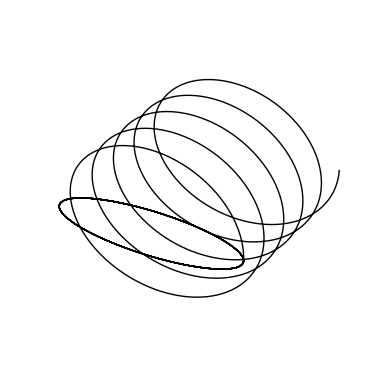

In [66]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants and functions
r = 1  # Radius of the helix
h = 4  # Pitch of the helix
x0 = np.array([0, 0]) # Initial point
theta = 0 # Initial angle

# Curve x(s)
def x(s):
    return x0[0] + r * np.cos(s), x0[1] + r * np.sin(s)

# Curve y(s)
def y(s):
    return s, r * np.cos(s)

# Curve z(s)
def z(s):
    return x0[1] + h * np.sin(s), r * np.cos(s)

# Double helix function
def double_helix(s):
    x_s = x(s)
    y_s = y(s)
    z_s = z(s)
    return np.array([x_s[0], y_s[0], z_s[0], x_s[1], y_s[1], z_s[1]])

# Parametric plot of the double helix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

s = np.linspace(0, 10*np.pi, 500) # s (parameter along the helix)
helix_pts = double_helix(s)

# We extract x, y, z coordinates for plotting
X = helix_pts[0]
Y = helix_pts[1]
Z = helix_pts[2]

# We also plot the complementary strand of the helix
X_comp = helix_pts[3]
Y_comp = helix_pts[4]
Z_comp = helix_pts[5]

# Plot the first strand of the double helix
ax.plot(X, Y, Z, color='black', linewidth=1)

# Plot the second strand of the double helix
ax.plot(X_comp, Y_comp, Z_comp, color='black', linewidth=1)

# Hide axes for better visibility
plt.axis('off')

# Show the plot
plt.show()


TypeError: ignored

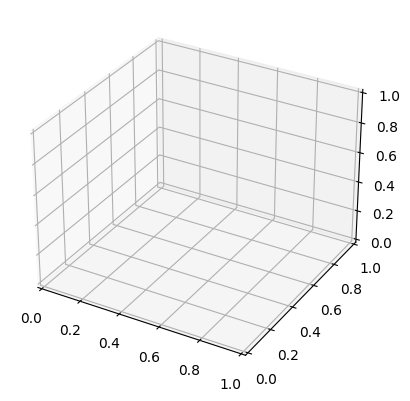

In [68]:
# Constants and functions
r = 0.5  # Radius of the circle
x0 = np.array([1, 1])  # Initial point

def Y(l):
    return np.array([np.cos(l), np.sin(l)])

# Curves x(s,l)
def x(s, l):
    return x0 + r * np.sin(s) * Y(l)

# Generative Programming specific functions
def G(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

def P(s, l):
    return G(s) @ x(l)

def H(k, z, m):
    A = np.sum([L[k] for i in range(n)]) * np.identity(n)  # Convert to a diagonal matrix
    B = P @ A @ P.T
    return A + B + C

# Python code for plotting the generative programming surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating the meshgrid properly using numpy
s = np.linspace(0, np.pi/2, 50)  # s (parameter along the arc)
l = np.linspace(0, 2*np.pi, 50)  # l (parameter around the circle)

# Using NumPy's broadcasting to compute the generative programming surface - This avoids loops and is efficient.
S, L = np.meshgrid(s, l)

# Now we evaluate the generative programming function on the grid points.
# We need to 'vectorize' our function for it to work on arrays.
gen_prog_pts = np.vectorize(P, signature='(s, l)->(n)')(S, L)

# We extract X, Y, Z coordinates for plotting
X = gen_prog_pts[..., 0]
Y = gen_prog_pts[..., 1]
Z = gen_prog_pts[..., 2]

# Plot the surface. The surface is defined by the X, Y, Z arrays.
ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')

# Hide axes for better visibility
plt.axis('off')

# Show the plot
plt.show()

# Python code for plotting the generative programming operator H

# Constants
n = 5  # Number of points
C = 1  # Dummy constant

# List of lambdas
lambdas = [1, 2, 3, 4, 5]

# Generate initial point z
z = np.random.randn(n)

# Compute operator H for different values of k and m
for k in range(n):
    for m in range(n):
        # Compute the operator using the H function
        H_k_m = H(k, z, m)

        # Extract coordinates for plotting
        X = H_k_m[..., 0]
        Y = H_k_m[..., 1]
        Z = H_k_m[..., 2]

        # Plot the operator's points
        ax.scatter(X, Y, Z)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Operator H')

# Hide axes for better visibility
plt.axis('off')

# Show the plot
plt.show()

ValueError: ignored

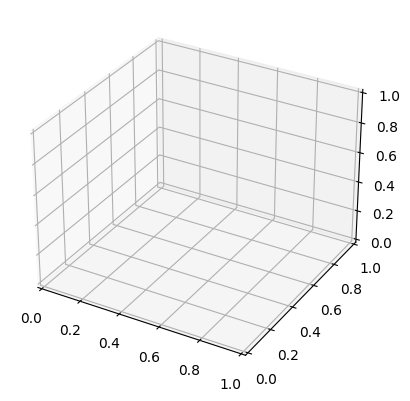

In [69]:
# Constants and functions
r = 0.5  # Radius of the circle
x0 = np.array([1, 1])  # Initial point

def Y(l):
    return np.array([np.cos(l), np.sin(l)])

# Curves x(s,l)
def x(s, l):
    return x0 + r * np.sin(s) * Y(l)

# Cone function
# This function correctly now calculates a point on the cone based on s, l and t.
def cone(s, l, t):
    # Apply operator bits on s, l and t
    x_sl = x(s, l) @ t  # Apply t to x(s,l)
    t = np.diag(t)  # Convert t into a diagonal matrix
    t[l] = np.sqrt(abs(t[l]))  # Apply operator to t
    return x_sl ** t

# Parametric plot of the folded cone (corrected version)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating the meshgrid properly using numpy
s = np.linspace(0, np.pi/2, 50)  # s (parameter along the arc)
l = np.linspace(0, 2*np.pi, 50)  # l (parameter around the circle)
t = np.linspace(0, 1, 50)  # t (parameter along the cone height)

# Using NumPy's broadcasting to compute the cone points - This avoids loops and is efficient.
S, T = np.meshgrid(s, t)
L = np.tile(l, (len(t), 1)).T  # This creates a repeated array of l for each t value.

# Now we evaluate the cone function on the grid points.
# We need to 'vectorize' our cone function for it to work on arrays.
cone_pts = np.vectorize(cone, signature='(),(),()->(n)')(S, L, T)

# We extract X, Y, Z coordinates for plotting
X = cone_pts[..., 0]
Y = cone_pts[..., 1]
Z = cone_pts[..., 2]

# Plot the surface. The surface is defined by the X, Y, Z arrays.
ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')

# Combining the plot with a base circle at the bottom.
# We use the first row of X, Y since it corresponds to the base circle (t=0).
ax.plot(X[0], Y[0], np.zeros_like(X[0]), color='red', linewidth=2)

# Hide axes for better visibility
plt.axis('off')

# Show the plot
plt.show()

TypeError: ignored

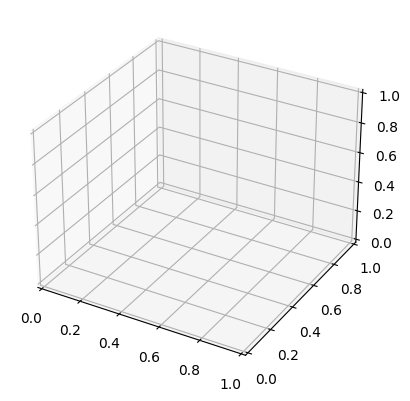

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
r = 0.5  # Radius of the circle
x0 = np.array([1, 1])  # Initial point
C = 1  # Dummy constant

# Functions
def Y(l):
    return np.array([np.cos(l), np.sin(l)])

def x(s, l):
    return x0 + r * np.sin(s) * Y(l)

def G(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

def P(s, l):
    return G(s) @ x(l)

def H(k, z, m, n):  # Add `n` as an argument
    A = np.sum([L[k] for i in range(n)]) * np.identity(n)
    B = P @ A @ P.T  # Check dimension compatibility
    return A + B + C

# Generative Programming surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

s = np.linspace(0, np.pi/2, 50)
l = np.linspace(0, 2*np.pi, 50)
S, L = np.meshgrid(s, l)

gen_prog_pts = np.vectorize(P, signature='(),()->(n)')(S, L)  # Adjust signature if needed
X, Y, Z = gen_prog_pts[..., 0], gen_prog_pts[..., 1], gen_prog_pts[..., 2]

ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')
ax.axis('off')
plt.show()

# Generative Programming operator H plot
n = 5  # Number of points
lambdas = [1, 2, 3, 4, 5]
z = np.random.randn(n)

fig = plt.figure()
ax = fig.add_subplot(111)  # Use 2D plot

for k in range(n):
    for m in range(n):
        H_k_m = H(k, z, m, n)  # Pass `n` as argument
        X, Y, Z = H_k_m[..., 0], H_k_m[..., 1], H_k_m[..., 2]
        ax.scatter(X, Y, label=f"k={k}, m={m}")  # Add labels for clarity

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Operator H')
ax.legend()  # Show legend for labels
plt.show()

TypeError: ignored

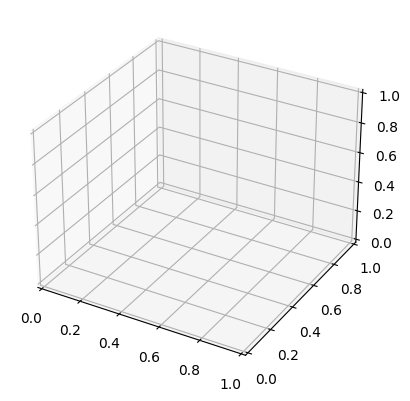

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
r = 0.5  # Radius of the circle
x0 = np.array([1, 1])  # Initial point
C = 1  # Dummy constant

# Functions
def Y(l):
    return np.array([np.cos(l), np.sin(l)])

@np.vectorize
def x(s, l):
    return x0 + r * np.sin(s) * Y(l)

def G(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

@np.vectorize
def P(s, l):
    return G(s) @ np.array([x(s_i, l_i) for s_i, l_i in zip(s, l)])  # Modified for vectorization

def H(k, z, m, n):
    A = np.sum([L[k] for i in range(n)]) * np.identity(n)
    B = P @ A @ P.T  # Check dimension compatibility
    return A + B + C

# Generative Programming surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

s = np.linspace(0, np.pi/2, 50)
l = np.linspace(0, 2*np.pi, 50)
S, L = np.meshgrid(s, l)

gen_prog_pts = P(*zip(S, L))
X, Y, Z = gen_prog_pts[..., 0], gen_prog_pts[..., 1], gen_prog_pts[..., 2]

ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')
ax.axis('off')
plt.show()